##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [30]:
#%pip install pandas 
#%pip install matplotlib
#%pip install seaborn 
#%pip install sklearn
#%pip install joblib

# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [6]:
# Can have as many cells as you want for code
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn import *

from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor


#df2= pd.read_csv("catA_train.csv")
#df2 = pd.read_csv("./data/catA_train.csv" ) #read data 

# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file


### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

# 1 Preparing data

A model needs data to be trained for predictions. But there are steps needed to ensure that the data is cleaned and ready for a model - if the data is wrongly formatted or missing, the model will not work as intended.

The steps below will help you get started should you be new to the concept.

## 1.1 Preparing Data

In [7]:
df2= pd.read_csv("catA_train.csv")

In [8]:
# get information about our dataframe
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29182 entries, 0 to 29181
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LATITUDE                             29062 non-null  float64
 1   LONGITUDE                            29062 non-null  float64
 2   AccountID                            29182 non-null  object 
 3   Company                              29182 non-null  object 
 4   SIC Code                             29182 non-null  float64
 5   Industry                             29182 non-null  object 
 6   8-Digit SIC Code                     29182 non-null  float64
 7   8-Digit SIC Description              29182 non-null  object 
 8   Year Found                           28748 non-null  float64
 9   Entity Type                          29182 non-null  object 
 10  Parent Company                       28668 non-null  object 
 11  Parent Country              

In [9]:
# find the number of rows and columns in our dataset
print(df2.shape)

# find the names of columns in our dataset
print(df2.columns)

(29182, 28)
Index(['LATITUDE', 'LONGITUDE', 'AccountID', 'Company', 'SIC Code', 'Industry',
       '8-Digit SIC Code', '8-Digit SIC Description', 'Year Found',
       'Entity Type', 'Parent Company', 'Parent Country', 'Ownership Type',
       'Company Description', 'Square Footage',
       'Company Status (Active/Inactive)', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Import/Export Status',
       'Fiscal Year End', 'Global Ultimate Company', 'Global Ultimate Country',
       'Domestic Ultimate Company', 'Is Domestic Ultimate',
       'Is Global Ultimate'],
      dtype='object')


In [10]:
# check for the number of missing values in the dataframe
df2.isna().sum()

LATITUDE                                 120
LONGITUDE                                120
AccountID                                  0
Company                                    0
SIC Code                                   0
Industry                                   0
8-Digit SIC Code                           0
8-Digit SIC Description                    0
Year Found                               434
Entity Type                                0
Parent Company                           514
Parent Country                           520
Ownership Type                             0
Company Description                        0
Square Footage                         29182
Company Status (Active/Inactive)           0
Employees (Single Site)                12403
Employees (Domestic Ultimate Total)       79
Employees (Global Ultimate Total)       2774
Sales (Domestic Ultimate Total USD)        0
Sales (Global Ultimate Total USD)          0
Import/Export Status                   22569
Fiscal Yea

In [11]:
# show count, mean, std, and quintile information for each numerical column
df2.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


In [12]:
df2= df2.drop_duplicates() #remove duplicates if any

## 1.2 Processing Data

In [13]:
#make sense of data 
#finding the number of years established 
from datetime import datetime
current_year = datetime.now().year
df2['Number of Years Established'] = current_year - df2['Year Found'] 

#### Drop NaN Values
- We choose to drop rows without latitude and longitude coordinates as they only form a very small part of our dataset.

In [39]:
# removes rows without either lat or long coordinates
df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE"])

#### One-Hot Encoding
We will also handle categorical variables by performing one-hot encoding on all columns with important categories as values. This is done by using the pd.get_dummies function.

An alternative approach using the LabelEncoder from scikit-learn is also demonstrated.

- Be cautious about the Curse of Dimensionality!

In [40]:
# Remove rows where the Company Status is 'Inactive'
df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']

In [41]:
# to ensure important info isnt being lost
df2['Import/Export Status_Missing'] = df2['Import/Export Status'].isna()

df3 = df2.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])

df3 = pd.get_dummies(df3, columns=['Entity Type'], prefix='Entity_Type')
df3 = pd.get_dummies(df3, columns=['Ownership Type'], prefix='Ownership_Type')
df3 = pd.get_dummies(df3, columns=['Import/Export Status'], prefix='Import_Export_Status')

df3 = df3.drop(columns=[col for col in ["Company Status (Active/Inactive)", "Entity Type", 'Import/Export Status', 'Ownership Type'] if col in df2.columns], errors='ignore') # are all Active
# drop 'Entity Type', 'Import/Export Status', 'Ownership Type' since already done one hot encoding 
# drop 'Company Status (Active/Inactive)s since only left with companies that are active 

In [42]:
# Check the number of null values
df3.isna().sum()

LATITUDE                                           0
LONGITUDE                                          0
AccountID                                          0
Company                                            0
SIC Code                                           0
Industry                                           0
8-Digit SIC Code                                   0
8-Digit SIC Description                            0
Year Found                                         0
Parent Company                                   228
Parent Country                                   228
Company Description                                0
Square Footage                                 14311
Employees (Single Site)                            0
Employees (Domestic Ultimate Total)                0
Employees (Global Ultimate Total)                  0
Sales (Domestic Ultimate Total USD)                0
Sales (Global Ultimate Total USD)                  0
Fiscal Year End                               

In [43]:
# Find the frequency of each industry
sic_code_frequency = df3['SIC Code'].value_counts()

# Set a threshold for low-frequency SIC Codes
threshold = 7  # Adjust this threshold based on your preference

# Identify SIC Codes with frequency below the threshold
low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

# Replace these low-frequency SIC Codes with a common label "Others"
df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

sic_code_frequency1 = df3['SIC Code'].value_counts()

# Display the updated DataFrame
print(sic_code_frequency1)

6719.0    2783
Others     828
8742.0     650
7389.0     448
4731.0     432
          ... 
7832.0       7
5963.0       7
3663.0       7
3448.0       7
7549.0       7
Name: SIC Code, Length: 244, dtype: int64


In [44]:
# convert to str cus we dont want it to be trained as a numeric value
# Convert the entire column to a common data type (string in this case)
df3['SIC Code'] = df3['SIC Code'].astype(str)

The alternative approach to encoding is indicated below to deal with SIC Codes.

For more information on SIC Codes, visit the site here: https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list

In [45]:
# Use label encoding for 'SIC Code'
label_encoder = LabelEncoder()
df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])

In [46]:
df3["SIC Code"].unique()

array([ 67, 174, 243,  16, 176, 201, 204,  75,   3, 173,  63, 103, 180,
       112, 146,  33, 129, 228,  99,  58,  70,  84, 237, 124, 105, 172,
       171,  62, 116, 104, 145, 168,  65, 193,  89, 196, 150,  77,  74,
       184, 232, 181, 130, 240,  39, 207, 167, 192,  83, 131,  34, 120,
       238,  81, 189, 206,  92, 226, 199,  49, 157, 133,  15, 163, 195,
       186,  54,   5, 175, 169, 197, 100, 236,  96, 155, 106, 212, 152,
       208, 222,  43, 113, 233, 144, 241,  18, 213, 107, 148,  46,  91,
       225,  23, 128,   9, 141,  80,  95, 188,  78,  87, 132,  29, 230,
       125, 220, 216, 121,  11, 135, 191, 227, 223,  57, 160, 165,   1,
        60, 140,   6,  47, 239, 170, 123,  73, 134,  82, 221, 137,  97,
       194,  85,  31,  26,  10,  28,   2,  52, 139,  32,  71,  94,  36,
       242, 156,  40, 217,  93,  21, 143, 101,  61, 111, 159, 185,  69,
       234, 214, 147, 179,  79,  17, 151,  59, 119, 149,  98, 108, 215,
        12,  88,  55,  20,  90, 209, 187,  76,  30, 178, 219, 16

# 2 EDA

We will now proceed to analyze and visualize a subset of our data to gain some rough insight into how inputs in our data are related to our outputs.

## 2.1 Plotting Graphs

### Correlation Matrix

We will first use a Correlation Matrix to observe how a variable in the dataset are affected by other variables.

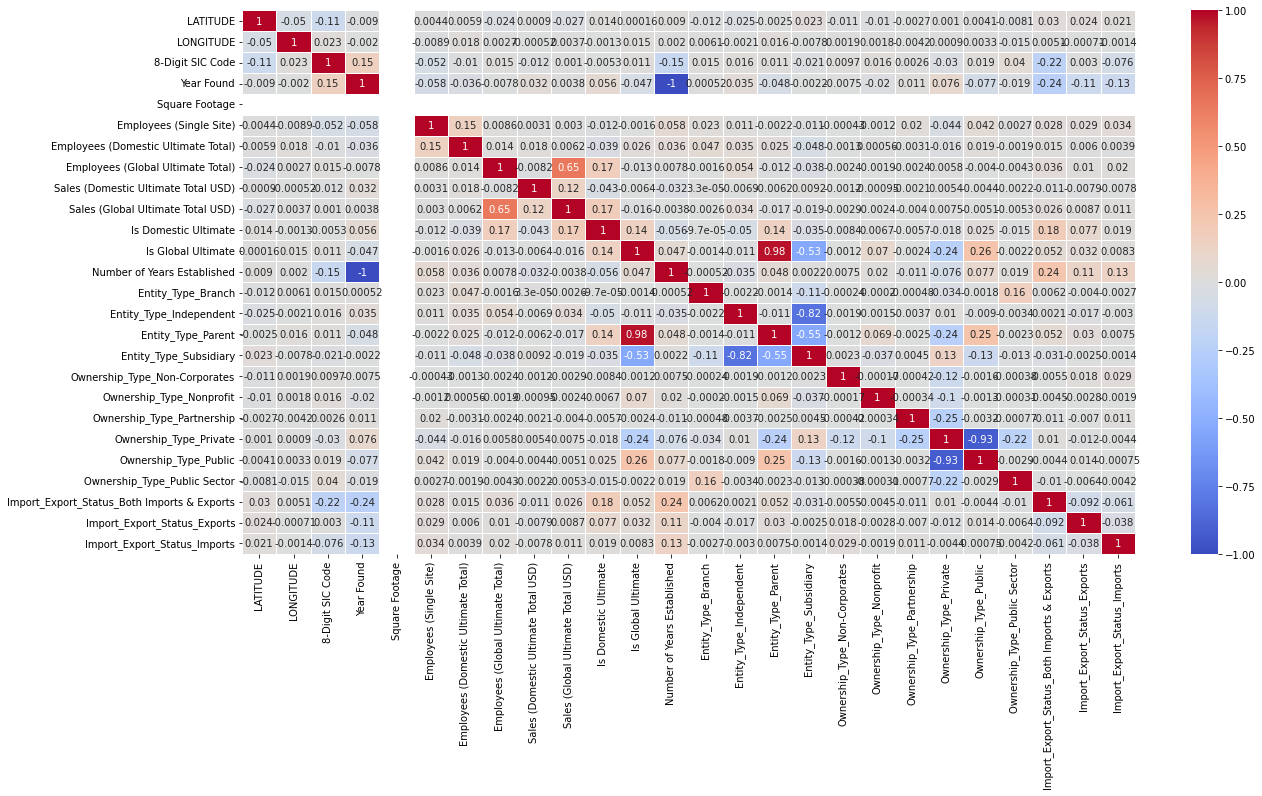

In [47]:
plt.figure(figsize =(20,10))
numerical_df = df3.select_dtypes(include=['float64', 'int64', 'uint8'])
sns.heatmap(numerical_df.corr(), vmin=None, vmax=None, cmap='coolwarm', center=0, robust=False, annot=True, fmt='.2g', annot_kws=None,\
             linewidths=0.5, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', \
                yticklabels='auto', mask=None, ax=None)
plt.show()

### Geospatial Analysis

This can be done either with Matplotlib (Plot latitude against longitude) or Folium (to visualize each pair of coordinates on a map of Singapore).

We will create a copy of our previously created dataframe and subset a small portion of it to perform the analysis on.

In [48]:
# for the upcoming geospatial analysis portion, we will use a small subset of the data provided for plotting.
filtered_df = df2[df2['SIC Code'].isin([5099, 1611, 8711, 4789])]

filtered_df.head(2)

,LATITUDE,LONGITUDE,AccountID,Company,SIC Code,Industry,8-Digit SIC Code,8-Digit SIC Description,Year Found,Entity Type,...,Sales (Global Ultimate Total USD),Import/Export Status,Fiscal Year End,Global Ultimate Company,Global Ultimate Country,Domestic Ultimate Company,Is Domestic Ultimate,Is Global Ultimate,Number of Years Established,Import/Export Status_Missing
30,1.264843,103.818291,LAKB2BID1337916,STATKRAFT HOLDING CHILE PTE. LTD.,8711.0,Engineering Services,87110000.0,Engineering services,2003.0,Subsidiary,...,7.412580e+09,NaN,NaN,Statkraft Sf,Norway,STATKRAFT HOLDING SINGAPORE PTE. LTD.,0.0,0.0,21.0,True
48,1.309792,103.865024,LAKB2BID9109451,ZALL INTERNATIONAL COMMERCE (SINGAPORE) PTE. LTD.,5099.0,"Durable Goods, Not Elsewhere Classified",50990000.0,"Durable goods, nec",2020.0,Subsidiary,...,1.478150e+05,NaN,2021-12-31T05:00:00Z,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,Singapore,ZALL SMART COMMERCE (SINGAPORE) PTE. LTD.,0.0,0.0,4.0,True


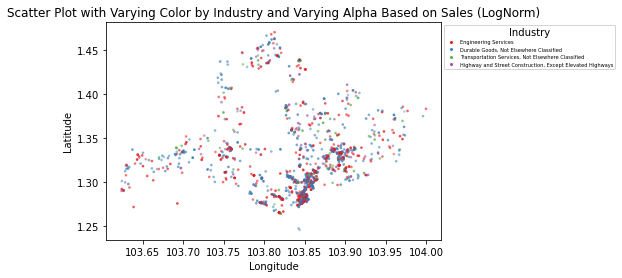

In [49]:
# read in the filtered dataset and do EDA. confusion matrix, etc
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a constant color (e.g., blue)
constant_color = 'blue'

# Define a color palette based on unique industries
industry_palette = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))

# Create a dictionary to map Industry to a unique color
industry_colors = dict(zip(filtered_df['Industry'].unique(), industry_palette))

# Scatter plot with varying color by Industry and varying alpha based on Sales values
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(industry_colors), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))

# Add a legend for Industry
legend_labels = filtered_df['Industry'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                              markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]
plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

# Show the plot
plt.show()

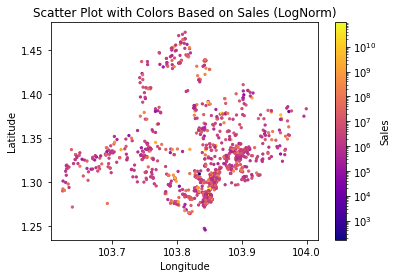

In [50]:
# Use LogNorm for more sensitivity to numerical changes
norm = LogNorm()

# Define a colormap transitioning from blue to red
cmap = 'plasma'

# Scatter plot with colors based on Sales values and LogNorm
scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

# Add a colorbar
cbar = plt.colorbar(scatter, label='Sales')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')

# Show the plot
plt.show()

## 2.2 Feature Selection
We will remove features that are of the following:
- seemingly irrelevant to affecting the output by domain knowledge;
- Low/Zero-variance Factors.

We will also filter our dataset to select only the rows of data we are interested in.

In [51]:
# Specify columns to drop
columns_to_drop = ["error", "Fiscal Year End", "Sales (Global Ultimate Total USD)", "Global Ultimate Company", "Domestic Ultimate Company", "Web Address",
                   "Sales (Global Ultimate Total USD)", "Square Footage", "Company Description", "PostCode", "8-Digit SIC Code", "8-Digit SIC Description", "AccountID",
                   "Parent Company", "City", "Country", "Address", "Address1", "Industry", "Region", "Parent Country", "Global Ultimate Country", "Company"]

# Drop columns if they exist in the DataFrame
df4 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns], errors='ignore')


# 'Fiscal Year End' - Too many missing values and this column is not essential for prediction
# 'Square Footage' - no values here 
# "Sales (Global Ultimate Total USD)", "Sales (Global Ultimate Total USD)" - not required to analyse the correlation because this is the "y" side 
# 'Global Ultimate Company', 'Domestic Ultimate company' because the variable 'Is Domestic Ultimate', 'Is Global Ultimate' already reflects the essential information required for prediction 
# 'Account ID', 'Company', 'Parent Company', 'Company Description' - does not really show anything 

In [52]:
df4 = df4.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])

### Data Type Conversion

We will need to convert some columns into datatypes that are suitable for analysis. This makes sure that the values in these fields make sense.

In [53]:
# Convert 'Is Domestic Ultimate' to True/False
df4['Is Domestic Ultimate'] = df4['Is Domestic Ultimate'] == 1
df4['Is Global Ultimate'] = df4['Is Global Ultimate'] == 1

In [54]:
df4.columns

Index(['LATITUDE', 'LONGITUDE', 'SIC Code', 'Year Found',
       'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate', 'Number of Years Established',
       'Import/Export Status_Missing', 'Entity_Type_Branch',
       'Entity_Type_Independent', 'Entity_Type_Parent',
       'Entity_Type_Subsidiary', 'Ownership_Type_Non-Corporates',
       'Ownership_Type_Nonprofit', 'Ownership_Type_Partnership',
       'Ownership_Type_Private', 'Ownership_Type_Public',
       'Ownership_Type_Public Sector',
       'Import_Export_Status_Both Imports & Exports',
       'Import_Export_Status_Exports', 'Import_Export_Status_Imports'],
      dtype='object')

### Correlation again 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14311 entries, 1 to 29181
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   LATITUDE                                     14311 non-null  float64
 1   LONGITUDE                                    14311 non-null  float64
 2   SIC Code                                     14311 non-null  int32  
 3   Year Found                                   14311 non-null  float64
 4   Employees (Single Site)                      14311 non-null  float64
 5   Employees (Domestic Ultimate Total)          14311 non-null  float64
 6   Employees (Global Ultimate Total)            14311 non-null  float64
 7   Sales (Domestic Ultimate Total USD)          14311 non-null  float64
 8   Is Domestic Ultimate                         14311 non-null  bool   
 9   Is Global Ultimate                           14311 non-null  bool   
 10

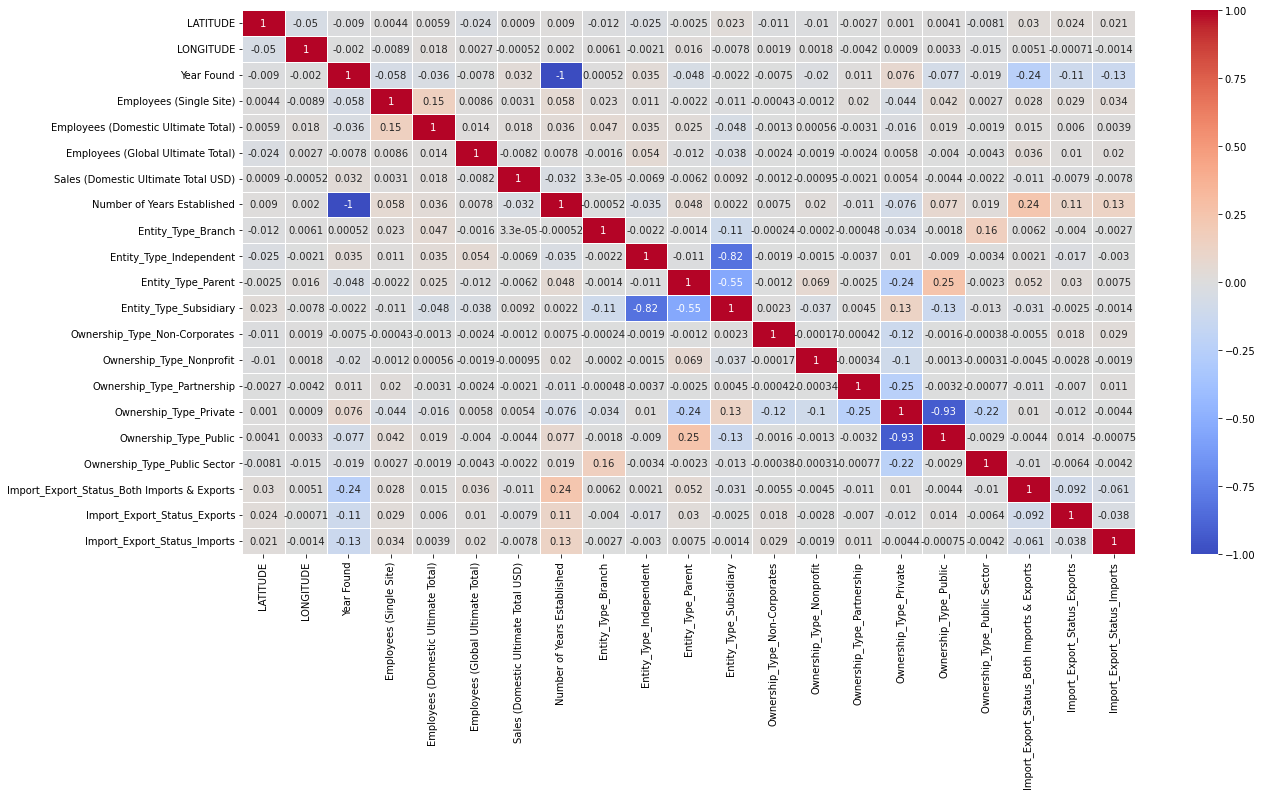

In [55]:
df4.info()
df4.isna().sum() 
plt.figure(figsize =(20,10))
numerical_df = df4.select_dtypes(include=['float64', 'int64', 'uint8'])
sns.heatmap(numerical_df.corr(), vmin=None, vmax=None, cmap='coolwarm', center=0, robust=False, annot=True, fmt='.2g', annot_kws=None,\
             linewidths=0.5, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', \
                yticklabels='auto', mask=None, ax=None)
plt.show()

# 3 Model Training and Evaluation

## 3.1 Selecting a Model
Selecting a model involves a couple of decisions to make:

- Train-test Split: the proportion of data used to train, test and evaluate our data,
- Type of ML model used (well-known ones include Decision Trees, Random Forests, Support Vector Machines, Linear/Logistic Regression and Neural Networks).

In our case, we will use the Gradient Boosting Regressor provisioned by scikit-learn.

In [56]:
# Separate features and target variable
X = df4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
y = df4['Sales (Domestic Ultimate Total USD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

### Cross-Validation

We will also perform a K-fold Cross Validation. This helps us mitigate the risk of overfitting on a specific set of data, by being able to split the data into K number of folds, test on 1 fold and train for the rest for K number of times.

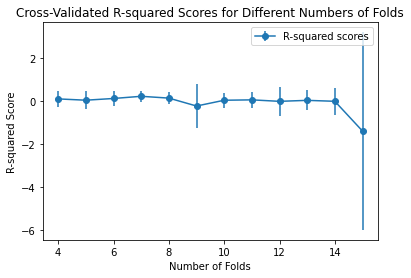

In [57]:
# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Iterate over different numbers of folds
for n_folds in n_folds_values:
    # Use k-fold cross-validation with the current number of folds
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Append mean and standard deviation of R-squared scores to lists
    mean_r2_scores.append(cv_scores.mean())
    std_r2_scores.append(cv_scores.std())

# Plot the results
plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
plt.xlabel('Number of Folds')
plt.ylabel('R-squared Score')
plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
plt.legend()
plt.show()

## 3.2 Model Evalutation Metrics

There are many ways to evaluate a Machine Learning model:

- Residual Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Average Percentage Error (MAPE) for Regression Tasks;
- Confusion Matrix, AUC-ROC Curve for Classification Problems;
- and other variants of such metrics.

In this problem, MSE will be very big as the sales are very large by nature. We will opt to use the R-Squared Score (used to score how well a regression model fits its data).

In [58]:
# Use k-fold cross-validation with 10 folds
model_10 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test, y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [-0.17947185  0.44721379 -0.64335425 -0.37870635  0.0520433  -0.05375093
  0.4160549   0.34490809  0.30732851  0.12975633]
Mean R-squared score: 0.044202153473853555
Standard Deviation of R-squared scores: 0.3433574897799162
Test R-squared score: 0.24876954467464418


# Saving and testing the model

We will export our model into a Hierarchical Data Format 5 File (.h5) for use by others. A general use case will also be covered in the form of a function below.

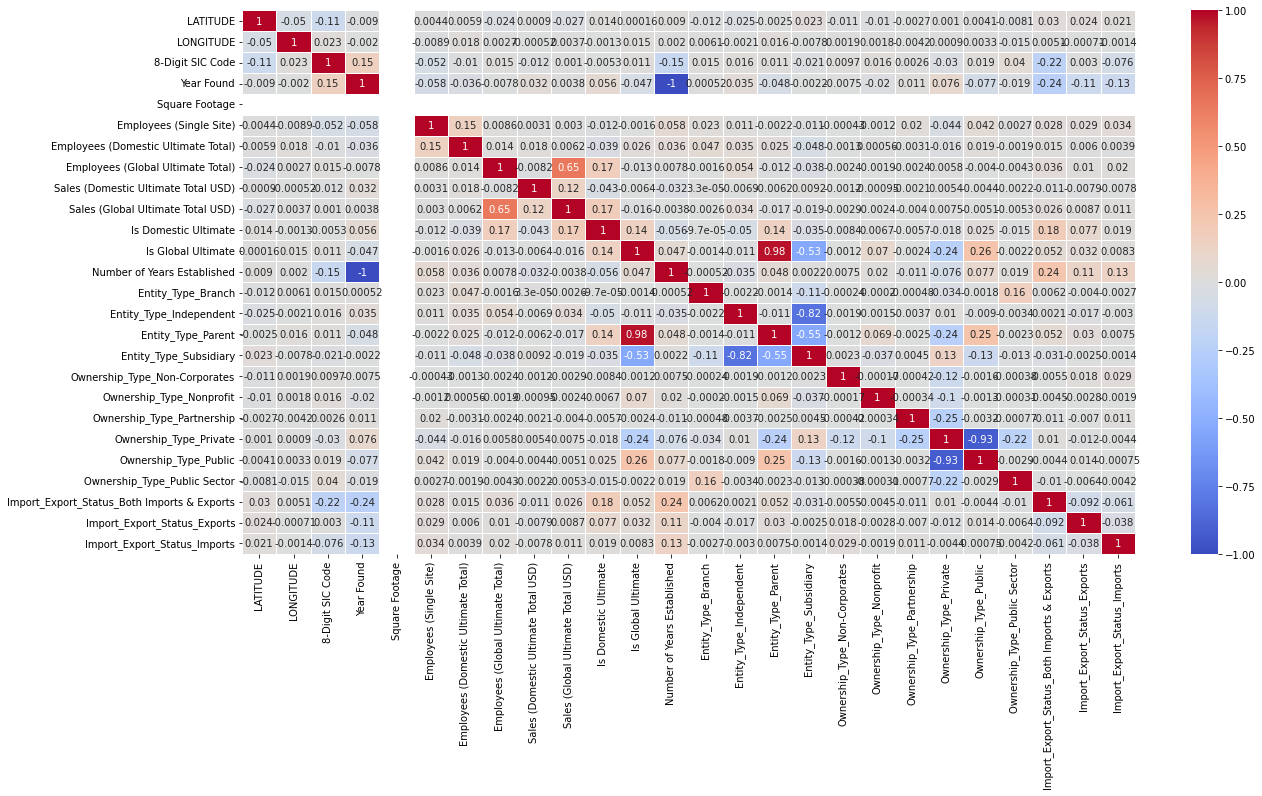

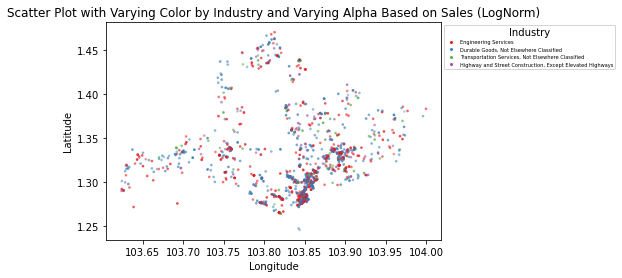

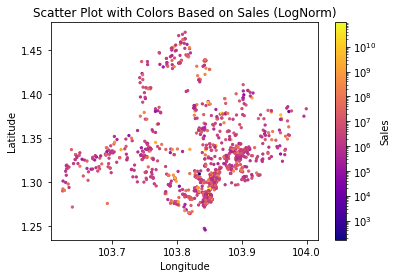

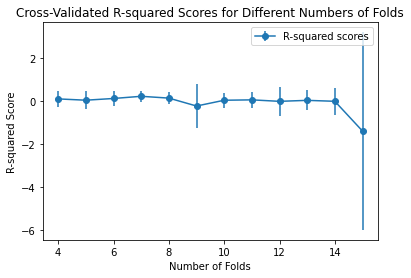

Cross-Validation R-squared scores: [-0.17947185  0.44721379 -0.64335425 -0.37870635  0.0520433  -0.05375093
  0.4160549   0.34490809  0.30732851  0.12975633]
Mean R-squared score: 0.044202153473853555
Standard Deviation of R-squared scores: 0.3433574897799162
Test R-squared score: 0.24876954467464418


In [14]:
# Can have as many cells as you want for code
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn import *
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import LogNorm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime

def train_model(data): 

    df2= data.drop_duplicates() #remove duplicates if any


    '''1.2 processing data '''

    #make sense of data 
    #finding the number of years established 
    current_year = datetime.now().year
    df2['Number of Years Established'] = current_year - data['Year Found'] 

    df2 = df2.dropna(subset=["LATITUDE", "LONGITUDE"])

    df2 = df2[df2['Company Status (Active/Inactive)'] == 'Active']

    # to ensure important info isnt being lost
    df2['Import/Export Status_Missing'] = df2['Import/Export Status'].isna()

    df3 = df2.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                        "Year Found"])

    df3 = pd.get_dummies(df3, columns=['Entity Type'], prefix='Entity_Type')
    df3 = pd.get_dummies(df3, columns=['Ownership Type'], prefix='Ownership_Type')
    df3 = pd.get_dummies(df3, columns=['Import/Export Status'], prefix='Import_Export_Status')

    df3 = df3.drop(columns=[col for col in ["Company Status (Active/Inactive)", "Entity Type", 'Import/Export Status', 'Ownership Type'] if col in df2.columns], errors='ignore') # are all Active
    # drop 'Entity Type', 'Import/Export Status', 'Ownership Type' since already done one hot encoding 
    # drop 'Company Status (Active/Inactive)s since only left with companies that are active 


    # Find the frequency of each industry
    sic_code_frequency = df3['SIC Code'].value_counts()

    # Set a threshold for low-frequency SIC Codes
    threshold = 7  # Adjust this threshold based on your preference

    # Identify SIC Codes with frequency below the threshold
    low_frequency_sic_codes = sic_code_frequency[sic_code_frequency < threshold].index

    # Replace these low-frequency SIC Codes with a common label "Others"
    df3['SIC Code'] = df3['SIC Code'].replace(low_frequency_sic_codes, 'Others')

    sic_code_frequency1 = df3['SIC Code'].value_counts()

    # convert to str cus we dont want it to be trained as a numeric value
    # Convert the entire column to a common data type (string in this case)
    df3['SIC Code'] = df3['SIC Code'].astype(str)

    # Use label encoding for 'SIC Code'
    label_encoder = LabelEncoder()
    df3['SIC Code'] = label_encoder.fit_transform(df3['SIC Code'])


    plt.figure(figsize =(20,10))
    numerical_df = df3.select_dtypes(include=['float64', 'int64', 'uint8'])
    sns.heatmap(numerical_df.corr(), vmin=None, vmax=None, cmap='coolwarm', center=0, robust=False, annot=True, fmt='.2g', annot_kws=None,\
                linewidths=0.5, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', \
                    yticklabels='auto', mask=None, ax=None)
    plt.show()

    # for the upcoming geospatial analysis portion, we will use a small subset of the data provided for plotting.
    filtered_df = df2[df2['SIC Code'].isin([5099, 1611, 8711, 4789])]

    filtered_df.head(2)


    # read in the filtered dataset and do EDA. confusion matrix, etc
    # Use LogNorm for more sensitivity to numerical changes
    norm = LogNorm()

    # Define a constant color (e.g., blue)
    constant_color = 'blue'

    # Define a color palette based on unique industries
    industry_palette = sns.color_palette('Set1', n_colors=len(filtered_df['Industry'].unique()))

    # Create a dictionary to map Industry to a unique color
    industry_colors = dict(zip(filtered_df['Industry'].unique(), industry_palette))

    # Scatter plot with varying color by Industry and varying alpha based on Sales values
    scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Industry'].map(industry_colors), s=3, alpha=norm(filtered_df['Sales (Domestic Ultimate Total USD)']))

    # Add a legend for Industry
    legend_labels = filtered_df['Industry'].unique()
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=industry,
                                markerfacecolor=industry_colors[industry], markersize=4) for industry in legend_labels]
    plt.legend(handles=legend_handles, title='Industry', prop={'size': 5}, loc='upper left', bbox_to_anchor=(1, 1))

    # Set labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Scatter Plot with Varying Color by Industry and Varying Alpha Based on Sales (LogNorm)')

    # Show the plot
    plt.show()


    # Use LogNorm for more sensitivity to numerical changes
    norm = LogNorm()

    # Define a colormap transitioning from blue to red
    cmap = 'plasma'

    # Scatter plot with colors based on Sales values and LogNorm
    scatter = plt.scatter(filtered_df['LONGITUDE'], filtered_df['LATITUDE'], c=filtered_df['Sales (Domestic Ultimate Total USD)'], cmap=cmap, s=5, norm=norm)

    # Add a colorbar
    cbar = plt.colorbar(scatter, label='Sales')

    # Set labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Scatter Plot with Colors Based on Sales (LogNorm)')

    # Show the plot
    plt.show()


    '''Feature Selection'''
    # Specify columns to drop
    columns_to_drop = ["error", "Fiscal Year End", "Sales (Global Ultimate Total USD)", "Global Ultimate Company", "Domestic Ultimate Company", "Web Address",
                    "Sales (Global Ultimate Total USD)", "Square Footage", "Company Description", "PostCode", "8-Digit SIC Code", "8-Digit SIC Description", "AccountID",
                    "Parent Company", "City", "Country", "Address", "Address1", "Industry", "Region", "Parent Country", "Global Ultimate Country", "Company"]

    # Drop columns if they exist in the DataFrame
    df4 = df3.drop(columns=[col for col in columns_to_drop if col in df3.columns], errors='ignore')


    # 'Fiscal Year End' - Too many missing values and this column is not essential for prediction
    # 'Square Footage' - no values here 
    # "Sales (Global Ultimate Total USD)", "Sales (Global Ultimate Total USD)" - not required to analyse the correlation because this is the "y" side 
    # 'Global Ultimate Company', 'Domestic Ultimate company' because the variable 'Is Domestic Ultimate', 'Is Global Ultimate' already reflects the essential information required for prediction 
    # 'Account ID', 'Company', 'Parent Company', 'Company Description' - does not really show anything 

    df4 = df4.dropna(subset=["Employees (Single Site)", "Employees (Domestic Ultimate Total)", "Employees (Global Ultimate Total)",
                                       "Year Found"])
    

    # Convert 'Is Domestic Ultimate' to True/False
    df4['Is Domestic Ultimate'] = df4['Is Domestic Ultimate'] == 1
    df4['Is Global Ultimate'] = df4['Is Global Ultimate'] == 1


    # Separate features and target variable
    X = df4.drop('Sales (Domestic Ultimate Total USD)', axis=1)
    y = df4['Sales (Domestic Ultimate Total USD)']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the GradientBoostingRegressor
    model = GradientBoostingRegressor(random_state=42)


    # Lists to store results
    n_folds_values = list(range(4, 16))
    mean_r2_scores = []
    std_r2_scores = []

    # Iterate over different numbers of folds
    for n_folds in n_folds_values:
        # Use k-fold cross-validation with the current number of folds
        kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

        # Perform cross-validation and get R-squared scores
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

        # Append mean and standard deviation of R-squared scores to lists
        mean_r2_scores.append(cv_scores.mean())
        std_r2_scores.append(cv_scores.std())

    # Plot the results
    plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
    plt.xlabel('Number of Folds')
    plt.ylabel('R-squared Score')
    plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
    plt.legend()
    plt.show()


    # Use k-fold cross-validation with 10 folds
    model_10 = GradientBoostingRegressor(random_state=42)
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Perform cross-validation and get R-squared scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

    # Print the R-squared scores for each fold
    print("Cross-Validation R-squared scores:", cv_scores)

    # Print the mean and standard deviation of the R-squared scores
    print("Mean R-squared score:", cv_scores.mean())
    print("Standard Deviation of R-squared scores:", cv_scores.std())

    # Train the model on the entire training set
    model_10.fit(X_train, y_train)

    # Evaluate the model on the test set
    test_score = model_10.score(X_test, y_test)
    print("Test R-squared score:", test_score)

    
df = pd.read_csv("./data/catA_train.csv" )
#df= pd.read_csv("catA_train.csv")
train_model(df)

In [59]:
# Save the base model to an HDF5 file
joblib.dump(model_10, 'base_model.h5')

['base_model.h5']

In [60]:
def load_model(data):
    # we assume the data is cleaned
    # To load the model in the future
    loaded_model = joblib.load('./base_model.h5')
    predictions = loaded_model.predict(data)

    return predictions

# Extract the last row of the test set
last_row = X_test.iloc[[1]]

# Make predictions on the last row
print(load_model(last_row))

[95443273.97623664]


In [61]:
###...code...###

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [62]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [63]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

NameError: name 'filepath' is not defined

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!